<a href="https://colab.research.google.com/github/dinesh875-k/employee-salary-prediction/blob/main/employee_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('/content/Updated_Employee_Salary_Dataset_Adjusted.csv')


In [3]:
df

,ID,Experience_Years,Age,Gender,Salary
0,1,5,28,Female,67878
1,2,1,21,Male,20000
2,3,3,23,Female,40000
3,4,2,22,Male,30000
4,5,1,17,Male,20000
...,...,...,...,...,...
80,81,8,52,Female,159180
81,82,11,36,Female,521669
82,83,13,35,Male,737193
83,84,13,37,Male,851304


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                85 non-null     int64 
 1   Experience_Years  85 non-null     int64 
 2   Age               85 non-null     int64 
 3   Gender            85 non-null     object
 4   Salary            85 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ KB


In [5]:
df.describe()

,ID,Experience_Years,Age,Salary
count,85.000000,85.000000,85.000000,8.500000e+01
mean,43.000000,7.564706,39.882353,3.436729e+05
std,24.681302,6.022670,12.837271,4.311589e+05
min,1.000000,0.000000,17.000000,0.000000e+00
25%,22.000000,3.000000,29.000000,4.000000e+04
50%,43.000000,6.000000,40.000000,9.020100e+04
75%,64.000000,11.000000,53.000000,5.968530e+05
max,85.000000,27.000000,62.000000,1.470028e+06


In [6]:
df.shape

(85, 5)

In [7]:
df = df.drop(columns=['ID'])

In [8]:
df.head()

,Experience_Years,Age,Gender,Salary
0,5,28,Female,67878
1,1,21,Male,20000
2,3,23,Female,40000
3,2,22,Male,30000
4,1,17,Male,20000


In [9]:
df.tail()

,Experience_Years,Age,Gender,Salary
80,8,52,Female,159180
81,11,36,Female,521669
82,13,35,Male,737193
83,13,37,Male,851304
84,2,53,Female,30000


In [10]:
df.isnull().sum()        # Count missing values per column

,0
Experience_Years,0
Age,0
Gender,0
Salary,0


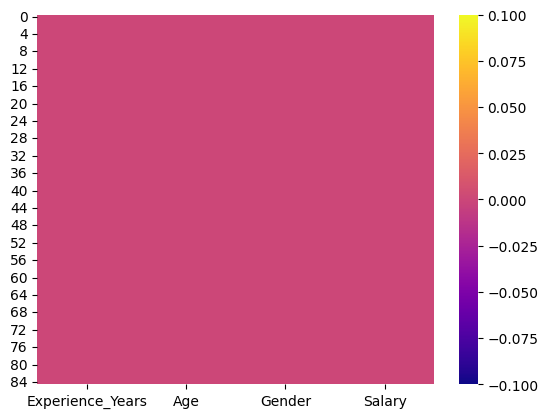

In [11]:
#Visualize missing data patterns using heatmaps
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=True, cmap='plasma')
plt.show()

In [12]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male=1, Female=0

In [13]:
X = df[['Experience_Years', 'Age', 'Gender']]
y = df['Salary']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_preds = linear_model.predict(X_test)
linear_mae = mean_absolute_error(y_test, linear_preds)
linear_r2 = r2_score(y_test, linear_preds)


In [16]:
print("Linear Regression:")
print(f"  Coefficients: {linear_model.coef_}")
print(f"  Intercept: {linear_model.intercept_}")
print(f"  MAE: ₹{linear_mae:,.0f}")
print(f"  R² Score: {linear_r2:.2f}\n")

Linear Regression:
  Coefficients: [68955.70810995  -969.7746836  30702.98884516]
  Intercept: -156830.33163336792
  MAE: ₹81,720
  R² Score: 0.92



In [17]:
# 2. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)


In [18]:
print("Random Forest Regressor:")
print(f"  MAE: ₹{rf_mae:,.0f}")
print(f"  R² Score: {rf_r2:.2f}")

Random Forest Regressor:
  MAE: ₹13,630
  R² Score: 0.99


In [19]:
# Example: Predict salary for a new employee
def predict_salary(age, experience, gender_str):
    gender = label_encoder.transform([gender_str])[0]
    input_data = pd.DataFrame([[experience, age, gender]], columns=['Experience_Years', 'Age', 'Gender'])
    linear_salary = linear_model.predict(input_data)[0]
    rf_salary = rf_model.predict(input_data)[0]
    return {
        "Linear Regression Prediction": round(linear_salary, 2),
        "Random Forest Prediction": round(rf_salary, 2)
    }

# Example usage
print(predict_salary(age=30, experience=5, gender_str='Male'))


{'Linear Regression Prediction': np.float64(189557.96), 'Random Forest Prediction': np.float64(70608.75)}


In [20]:
import pickle

with open('salary_model.pkl', 'wb') as file:
    pickle.dump(linear_model, file)

In [21]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.1 MB/s eta 0:00:00


In [22]:
!wget -q -O - ipv4.icanhazip.com

35.237.251.155


In [23]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("salary_model.pkl")

# Page config
st.set_page_config(page_title="Employee Salary Prediction", page_icon="💰", layout="centered")

# Main title
st.markdown("<h1 style='text-align: center;'>💸💰 Employee Salary Prediction App </h1>", unsafe_allow_html=True)
st.markdown("<h4 style='text-align: center; color: gray;'>Predict estimated salary based on Age, Experience, and Gender</h4>", unsafe_allow_html=True)
st.markdown("---")

# Sidebar inputs
with st.sidebar:
    st.header("🧾 Input Employee Details")
    age = st.slider("🎂 Age", min_value=18, max_value=65, value=30)
    experience = st.slider("💼 Years of Experience", min_value=0, max_value=40, value=5)
    gender = st.selectbox("👤 Gender", ["Male", "Female"])

# Convert gender to numeric format
gender_encoded = 1 if gender == "Male" else 0

# Prepare input DataFrame
input_df = pd.DataFrame({
    'Experience_Years': [experience],
    'Age': [age],
    'Gender': [gender_encoded]
})

# Display user inputs in a nice format
st.subheader("📋 Input Summary")
col1, col2, col3 = st.columns(3)
col1.metric("Age", f"{age} years")
col2.metric("Experience", f"{experience} yrs")
col3.metric("Gender", gender)

# Show raw input DataFrame (optional)
with st.expander("📊 See input dataframe"):
    st.dataframe(input_df, use_container_width=True)

# Predict salary
if st.button("🚀 Predict Salary"):
    prediction = model.predict(input_df)[0]
    final_salary = max(0, prediction)

    st.markdown("---")
    st.markdown("## 🧮 Prediction Result")

    st.success(f"💰 Estimated Salary: ₹{final_salary:,.2f}/-")

    if final_salary < 100000:
        st.error("💔 Salary is too low... 😢 Keep pushing forward!")
        st.info("📉 This seems to be a low salary range.")
    elif final_salary < 500000:
        st.warning("📈 Moderate salary range.")
    else:
        st.balloons()
        st.success("🎉 High salary detected! Great!")

# Footer
st.markdown("---")
st.markdown("<div style='text-align: center; color: grey;'>Made by  Dinesh Kolasani❤️ </div>", unsafe_allow_html=True)


Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙

⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.237.251.155:8501

⠧⠇Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸your url is: https://honest-insects-flow.loca.lt
